In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url='D:/CRIMEDATA/KCPD_Crime_Data_2017.csv'

In [3]:
dataset=pd.read_csv(url)

In [4]:
dataset.head(5)

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,170086272,10/05/2017,10:00,10/04/2017,16:00,10/05/2017,10:00,690,23H,Stealing All Other,...,PJ4582,MPD,U,1,SUS,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,170026074,04/12/2017,13:01,03/20/2017,11:30,04/11/2017,00:45,630,23C,Stealing Shoplifting,...,PJ2875,EPD,U,1,VIC,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,170003559,01/15/2017,02:35,01/15/2017,02:35,NaN,NaN,1850,35B,Possession of Drug E,...,PP0269,NPD,U,1,ARR,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,170001089,01/05/2017,11:40,01/05/2017,11:40,NaN,NaN,1849,35A,Possession/Sale/Dist,...,PJ1046,CPD,U,1,VIC,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,170007467,01/30/2017,13:04,01/27/2017,21:25,01/27/2017,22:30,670,23D,Stealing from Buildi,...,PJ2012,EPD,U,1,VIC,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."


In [807]:
dataset.describe()

,Report_No,Offense,Beat,Zip Code,Invl_No,Age
count,1.321390e+05,132139.000000,131293.000000,132139.000000,132139.000000,71014.000000
mean,1.700392e+08,996.372131,328.665626,65068.210445,1.267446,37.493142
std,5.539807e+05,645.601640,195.853709,5764.338055,1.026722,15.185495
min,1.000808e+08,101.000000,0.000000,20619.000000,1.000000,18.000000
25%,1.700239e+08,630.000000,212.000000,64114.000000,1.000000,26.000000
50%,1.700588e+08,702.000000,315.000000,64127.000000,1.000000,34.000000
75%,1.700836e+08,1401.000000,422.000000,64133.000000,1.000000,47.000000
max,1.717068e+08,3079.000000,9514.000000,99999.000000,30.000000,507.000000


In [8]:
print('There is a mean of {}, and a median of {}. Which would be the most appropriate for this dataset?'.format(
    dataset['Age'].mean(), dataset.Age.median()))

There is a mean of 37.49314219729962, and a median of 37.493142197313205. Which would be the most appropriate for this dataset?


In [9]:
dataset['Age'].fillna(dataset.Age.mean(), inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132139 entries, 0 to 132138
Data columns (total 24 columns):
Report_No            132139 non-null int64
Reported_Date        132139 non-null object
Reported_Time        132139 non-null object
From_Date            131844 non-null object
From_Time            131744 non-null object
To_Date              49634 non-null object
To_Time              49140 non-null object
Offense              132139 non-null int64
IBRS                 131044 non-null object
Description          132139 non-null object
Beat                 131293 non-null float64
Address              132115 non-null object
City                 132101 non-null object
Zip Code             132139 non-null int64
Rep_Dist             131132 non-null object
Area                 131132 non-null object
DVFlag               132139 non-null object
Invl_No              132139 non-null int64
Involvement          132139 non-null object
Race                 114090 non-null object
Sex           

In [11]:
def describe_categorical(X):
    """
    This will create a table for looking at the categorical variables based on the dtype
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))

In [812]:
describe_categorical(dataset)

,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,IBRS,Description,Address,City,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Firearm Used Flag,Location
count,132139,132139,131844,131744,49634,49140,131044,132139,132115,132101,131132,131132,132139,132139,114090,114090,132139,132139
unique,365,1440,728,1436,495,1310,56,116,15396,38,6868,9,3,3,7,4,2,23769
top,02/21/2017,12:00,02/21/2017,12:00,06/18/2017,08:00,13B,Property Damage,11600 E US 40 HW,KANSAS CITY,PJ3601,EPD,U,VIC,B,M,N,11600 E US\nHW KANSAS CITY 64133\n
freq,567,561,523,4610,286,1999,15567,12206,1473,131519,1641,35166,101664,68526,45962,52857,121106,1381


In [14]:
print(dataset['Sex'].value_counts())
print(dataset['Firearm Used Flag'].value_counts())

0    96093
1    36046
Name: Sex, dtype: int64
1    121106
0     11033
Name: Firearm Used Flag, dtype: int64


In [13]:
dataset['Sex'] = dataset['Sex'].apply(lambda x: 1 if x == 'F' else 0)
dataset['Firearm Used Flag'] = dataset['Firearm Used Flag'].apply(lambda x: 1 if x == 'N' else 0)

In [15]:
dataset.drop(['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date','From_Time',       
'To_Date',              
'To_Time' , 
'IBRS'      ,
'Beat'        ,    
'Address'      ,       
'City'          , 
'Rep_Dist'        ,   
'Area',
'DVFlag',  
'Invl_No',   
'Involvement',  
'Race',

 
'Location'
], axis=1, inplace=True)

In [16]:
dataset.head()

,Offense,Description,Zip Code,Sex,Age,Firearm Used Flag
0,690,Stealing All Other,64113,0,37.493142,1
1,630,Stealing Shoplifting,64127,0,37.493142,1
2,1850,Possession of Drug E,64152,0,23.000000,1
3,1849,Possession/Sale/Dist,64106,0,37.493142,1
4,670,Stealing from Buildi,64127,1,38.000000,1


In [786]:
#sns.boxplot(x='Zip Code', y='Offense', data=dataset)

In [787]:
#sns.violinplot(x='Age', y='Offense', data=dataset)

In [17]:
dataset.drop(['Description'], axis=1, inplace=True)

dataset.head()

,Offense,Zip Code,Sex,Age,Firearm Used Flag
0,690,64113,0,37.493142,1
1,630,64127,0,37.493142,1
2,1850,64152,0,23.000000,1
3,1849,64106,0,37.493142,1
4,670,64127,1,38.000000,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
dataset.head(20)
X=dataset
y=X.pop('Offense')


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train, y_train)
lr_model.coef_
lr_model.intercept_

184.19902322643998

In [24]:
coeff_df= pd.DataFrame(lr_model.coef_,X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Zip Code,0.005481
Sex,-68.066383
Age,-0.844611
Firearm Used Flag,550.160624


In [25]:
y_pred = lr_model.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
44820,1050,995.986442
25360,401,468.157157
119881,640,993.211432
89737,670,1000.917073
14349,1188,1054.345594


In [833]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))  )
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, y_pred)**(0.05))  )

Mean Absolute Error: 496.477145117
Mean Squared Error: 396055.168181
Root Mean Squared Error: 629.329141373
Root Mean Squared Error: 1.90496843656


In [834]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_pred))

R^2:  0.0589327305382


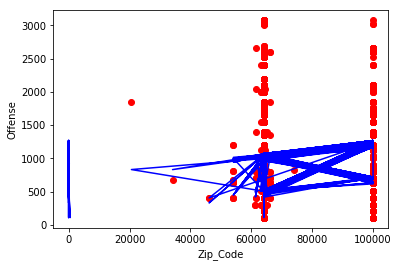

In [835]:
plt.scatter(X_test['Zip Code'], y_test, color = 'red')
plt.plot(X_test, lr_model.predict(X_test), color='blue')
plt.xlabel('Zip_Code')
plt.ylabel('Offense')
plt.show()

In [832]:
print("The model Y =  ", lr_model.coef_, " * X  + ", lr_model.intercept_)

The model Y =   [  5.48130394e-03  -6.80663826e+01  -8.44610632e-01   5.50160624e+02]  * X  +  184.199023226


StopIteration: 

In [630]:

y_predicted = lr_model.predict(X_test)

In [762]:
from sklearn.metrics import mean_absolute_error
print("RMSE: ", mean_absolute_error(y_test, y_predicted)**(.05))

RMSE:  1.36410658213


In [763]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_predicted))

R^2:  0.0564501351435


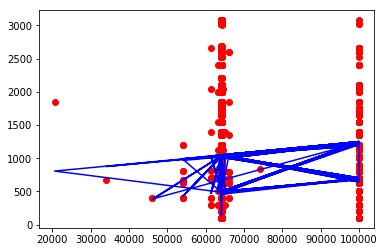

In [764]:
plt.scatter(X_test['Zip Code'], y_test, color = 'red')
plt.plot(X_test['Zip Code'], lr_model.predict(X_test), color='blue')

plt.show()

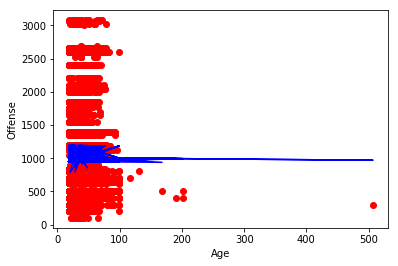

In [400]:
plt.scatter(X_test['Age'], y_test, color = 'red')
plt.plot(X_test['Age'], lr_model.predict(X_test), color='blue')
plt.xlabel('Age')
plt.ylabel('Offense')
plt.show()

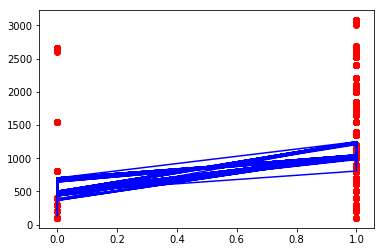

In [765]:
plt.scatter(X_test['Firearm Used Flag'], y_test, color = 'red')
plt.plot(X_test['Firearm Used Flag'], lr_model.predict(X_test), color='blue')

plt.show()

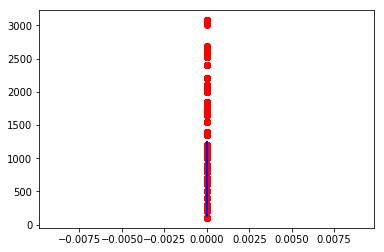

In [767]:
plt.scatter(X_test['Sex'], y_test, color = 'red')
plt.plot(X_test['Sex'], lr_model.predict(X_test), color='blue')

plt.show()

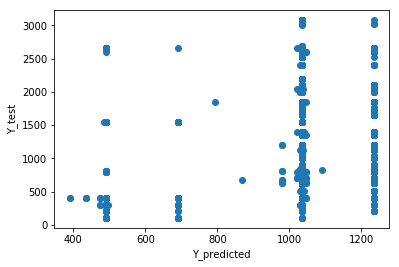

The more linear the graph the better we did at predicting y


In [766]:
plt.scatter(y_predicted, y_test)
plt.xlabel('Y_predicted')
plt.ylabel('Y_test')
plt.show()
print("The more linear the graph the better we did at predicting y")


In [371]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.003652


In [557]:
###########
dataset.head(20)

,Zip Code,Sex,Age
0,64113,0,37.493142
1,64127,0,37.493142
2,64152,0,23.000000
3,64106,0,37.493142
4,64127,1,38.000000
5,64116,0,37.493142
6,64106,1,34.000000
7,64132,0,25.000000
8,64127,0,37.493142
9,64105,0,26.000000


In [612]:
dataset.drop(['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date','From_Time',       
'To_Date',              
'To_Time' , 
'IBRS'      ,
'Beat'        ,    
'Address'      ,       
'City'          , 
'Rep_Dist'        ,   

'DVFlag',  
'Invl_No',   
'Involvement',  
'Race',


'Location'
], axis=1, inplace=True)

In [613]:

dataset.drop(['Area','Sex','Age'
], axis=1, inplace=True)

In [614]:
#print(dataset['Firearm Used Flag'].value_counts())
print(dataset['Area'].value_counts())

KeyError: 'Area'

In [703]:
dataset['Firearm Used Flag'] = dataset['Firearm Used Flag'].apply(lambda x: 1 if x == 'N' else 0)

In [706]:
dataset.head()

,Zip Code,Firearm Used Flag
0,64113,0
1,64127,0
2,64152,0
3,64106,0
4,64127,0


In [705]:
X1=dataset.drop(['Sex','Age'
], axis=1, inplace=True)

X1=dataset.drop(['Description', 'Age'
], axis=1, inplace=True)

ValueError: labels ['Description' 'Age'] not contained in axis

In [572]:
print(dataset['Description'].value_counts())

Property Damage         12206
Stealing From Auto       9511
Auto Theft               9461
Non Agg Assault Dome     9029
Burglary - Residence     8391
Aggravated Assault (     7132
Non Aggravated Assau     6547
Stealing Shoplifting     5968
Possession/Sale/Dist     5419
Stealing from Buildi     5060
Stealing All Other       4762
Misc Violation           4359
Armed Robbery            4291
Stealing Auto Parts/     4064
Trespassing              3461
Agg Assault - Domest     3062
Burglary - Non Resid     2341
Strong Arm Robbery       2020
Resisting an Officer     1895
Fraud/Confidence Gam     1707
Possession of Drug E     1667
Intimidation             1644
Disorderly Conduct       1557
Identity Theft           1366
Weapons Law Violatio     1192
Credit/Debit/ATM Car     1171
Driving Under Influe      989
Auto Theft Outside S      944
Violation Full Order      762
Stolen Property OFFE      712
                        ...  
Human Trafficking/Co        6
Family Disturbance          5
Animal Cru

In [430]:
dataset.head()

,Offense,Description,Zip Code,Firearm Used Flag
0,690,Stealing All Other,64113,1
1,630,Stealing Shoplifting,64127,1
2,1850,Possession of Drug E,64152,1
3,1849,Possession/Sale/Dist,64106,1
4,670,Stealing from Buildi,64127,1


In [573]:
#X1 = dataset[.iloc[:, 2:6]]
###dataset.drop(['Area'
#], axis=1, inplace=True)


In [574]:
X1 = dataset.iloc[:, 2:4]
y1 = dataset.iloc[:, 1].values

In [578]:
X1

,Zip Code,Firearm Used Flag
0,64113,1
1,64127,1
2,64152,1
3,64106,1
4,64127,1
5,64116,1
6,64106,1
7,64132,1
8,64127,1
9,64105,1


In [485]:
#y1 = (y1=='Stealing All Other')

In [486]:
y1[:]


array(['Stealing All Other', 'Stealing Shoplifting',
       'Possession of Drug E', ..., 'Stealing Shoplifting',
       'Agg Assault - Domest', 'Stealing Shoplifting'], dtype=object)

In [580]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, random_state=42)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [581]:
lr_model.coef_, lr_model.intercept_

(array([[ -1.69386282e-04,  -2.37018107e-09],
        [ -1.80302247e-04,  -2.53533764e-09],
        [ -1.69390204e-04,  -2.37004313e-09],
        [ -5.80224438e-05,  -9.48066526e-10],
        [ -8.14853887e-05,  -1.77993106e-09],
        [ -1.52156929e-04,  -2.24899991e-09],
        [ -4.41849441e-05,  -1.07853330e-09],
        [ -1.63016423e-04,  -2.26772504e-09],
        [ -5.24116604e-05,  -3.24576338e-05],
        [ -8.65279946e-05,  -1.18192929e-09],
        [ -1.47654269e-04,  -2.03957447e-09],
        [ -1.31146303e-04,  -1.79756824e-09],
        [ -1.47655824e-04,  -2.03950983e-09],
        [ -1.58510182e-04,  -2.21175081e-09],
        [ -1.31840151e-04,  -1.80851536e-09],
        [ -1.47423599e-04,  -2.16017606e-09],
        [ -1.12455615e-04,  -1.55370803e-09],
        [ -3.96474203e-05,  -4.88071530e-10],
        [ -7.57812880e-05,  -1.03414716e-09],
        [ -1.09876280e-04,  -1.52634583e-09],
        [ -6.19135607e-05,  -8.20734554e-10],
        [ -4.15356108e-05,  -5.194

In [582]:
y1

array(['Stealing All Other', 'Stealing Shoplifting',
       'Possession of Drug E', ..., 'Stealing Shoplifting',
       'Agg Assault - Domest', 'Stealing Shoplifting'], dtype=object)

In [583]:
print(X1.iloc[1,:], y1[0])

Zip Code             64127
Firearm Used Flag        1
Name: 1, dtype: int64 Stealing All Other


In [584]:
#y_pred_2 = lr_model.predict(X1.iloc[1, :].values.reshape(1,-1))


In [585]:
#y_pred_2

In [586]:
print (lr_model.score( X1_train , y1_train ))

0.0923177341998


In [503]:
######

In [665]:
from sklearn.linear_model import SGDRegressor

# Create an SGDClassifier instance which will have methods to do our linear regression fitting by gradient descent
fitter = SGDRegressor(loss="squared_loss", penalty=None)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [667]:
X = dataset.as_matrix(columns=["Zip Code"])  # SGDRegressor is very particular on input "X" and insists on a true matrix 
y = dataset["Offense"].tolist() # This is the variable we want to predict, SGDRegressor expects a vector-like object

In [668]:
fitter.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [670]:
xs = list(range(0, 26, 1))
xs = np.array(xs).reshape(-1, 1)

new_ys = fitter.predict(xs)

fig, ax = plt.subplots()
ax.scatter(dataset["Zip Code"], dataset["Offense"])
snp.labs("Zip Code", "Offense", "Data vs. Linear Regression Gradient Descent Fit")
ax.plot(xs, new_ys, color="red")

NameError: name 'snp' is not defined

In [673]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [675]:
scaler.fit(dataset)  # Train the transformer object so it knows what means and variances to use
X_transformed = scaler.transform(dataset)  # transform your training data in preparation for some badass ML algori

ValueError: could not convert string to float: '13100 HOLMES RD\nKANSAS CITY 64145\n(38.889239, -94.586045)'

In [693]:
dataset.head()

,Offense,Zip Code,Sex,Age,Firearm Used Flag
0,690,64113,0,37.493142,1
1,630,64127,0,37.493142,1
2,1850,64152,0,23.000000,1
3,1849,64106,0,37.493142,1
4,670,64127,1,38.000000,1


In [694]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = linear_model.SGDRegressor()
clf.fit(X, y)



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)